# Поиск с учётом условий Вольфе

## Реализация одномерного поиска с учётом условий Вольфе

Напомним, что метод одномерного поиска называют удовлетворяющим сильным условиям Вольфе, если для всех выбранных им $\alpha$

1. $f(x_k + \alpha_k p_k) \le f(x_k) + c_1 \alpha_k \nabla f_k^T p_k$
2. $|\nabla f^T(x_k + \alpha_k p_k) p_k| \ge c_2 |\nabla f_k^T p_k|$
где $c_1, c_2$ - константы, такие что $0 < c_1 < c_2 < 1$

В обозначениях $\varphi(\alpha) = f(x_k + \alpha p_k)$ это равносильно

1. $\varphi(\alpha_k) \le \varphi(0) + c_1 \alpha_k \varphi'(0)$
2. $|\varphi'(\alpha_k)| \ge c_2 |\varphi'(0)|$

Для нахождения подходящего $\alpha$ воспользуемся следующим алгоритмом:
Положим $\alpha_0$ = 0, $\alpha_{max}: \varphi(\alpha_{max}) > \varphi(0) + c_1 \alpha_{max} \varphi'(0), \alpha_1 = \alpha_{max} / 2$.
И будем увеличивать $\alpha_i$, пока не получим выполнения одного из следующих условий:

1. $\varphi(\alpha_i) \le \varphi(0) + c_1 \alpha_i \varphi'(0)$ или же $\varphi(\alpha_{i}) \ge \varphi(\alpha_{i-1})$ не на первом шаге. В этом случае в качестве результата предъявим $zoom(\alpha_{i-1}, \alpha_i)$ (определение $zoom$, выбирающего точки из интервала, ограниченного $\alpha_{i-1}$ и $\alpha_i$ дадим позже).
2. $|\varphi'(\alpha_i)| \le -c_2 \varphi'(0)$. В качестве результата предъявим $\alpha_i$
3. $\varphi'(\alpha_i) \ge 0$. В качестве результата предъявим $zoom(\alpha_i, \alpha_{i-1})$
Иначе положим $\alpha_{i+1} = \frac{\alpha_{max} + \alpha_i}{2}$ и перейдём на следующую итерацию.

Уточним, как $zoom$ находит нужную нам точку.

Утверждается, что на момент вызова $zoom(\alpha_{left}, \alpha_{right})$ выполнены следующие условия:

1. Внутри интервала, ограниченного $\alpha_{left}$ и $\alpha_{right}$ существует точка, удовлетворяющая строгим условиям Вольфе.
2. $\varphi'(\alpha_{left}) (\alpha_{right} - \alpha_{left}) < 0$
3. Среди всех полученных на данный момент $\alpha$, удовлетворяющим 1 условию Вольфе значение $\varphi(\alpha_{left})$ минимально.

Сам $zoom$ выполняет следующий алгоритм:
Положим $\alpha_{mid} = \frac{\alpha_{left} + \alpha_{right}}{2}$.
Если $\varphi(\alpha_{mid}) \le \varphi(0) + c_1 \alpha_{mid} \varphi'(0)$ или $\varphi(\alpha_{mid}) \ge \varphi(\alpha_{left})$, то положим $\alpha_{right} = \alpha_{mid}$ и перейдём на следующую итерацию.
Иначе же если $|\varphi'(\alpha_{mid})| \le -c_2 \varphi'(0)$, то $\alpha_{mid}$ удовлетворяет обоим условиям Вольфе, предъявим её как результат.
Иначе $\varphi(\alpha_{mid}) (\alpha_{right} - \alpha_{left}) \ge 0$ положим $\alpha_{high} = \alpha_{low}$
В конце присвоим $\alpha_{left} = \alpha_{mid}$ и перейдём к следующей итерации.

Заметим, что инвариант из трёх условий сохраняется и после выполнения итерации, то есть он верен в начале любой итерации. Тогда при сужении интервала поиска в конце мы найдём требуемое $\alpha$.

Протестируем полученный метод линейного поиска.

Optimizer trajectory:
[[-20.         -20.        ]
 [ 11.25       -13.25      ]
 [  3.4375      -8.1875    ]
 [  7.34375     -0.59375   ]
 [  4.4140625    1.3046875 ]
 [  5.87890625   4.15234375]
 [  4.78027344   4.86425781]
 [  5.32958984   5.93212891]
 [  4.91760254   6.19909668]
 [  5.12359619   6.59954834]
 [  4.96910095   6.69966125]
 [  5.04634857   6.84983063]
 [  4.98841286   6.88737297]
 [  5.01738071   6.94368649]
 [  4.99565482   6.95776486]
 [  5.00651777   6.97888243]
 [  4.99837056   6.98416182]
 [  5.00244416   6.99208091]
 [  4.99938896   6.99406068]
 [  5.00091656   6.99703034]
 [  4.99977086   6.99777276]
 [  5.00034371   6.99888638]
 [  4.99991407   6.99916478]
 [  5.00012889   6.99958239]
 [  4.99996778   6.99968679]
 [  5.00004833   6.9998434 ]
 [  4.99998792   6.99988255]
 [  5.00001813   6.99994127]
 [  4.99999547   6.99995596]
 [  5.0000068    6.99997798]
 [  4.9999983    6.99998348]
 [  5.00000255   6.99999174]
 [  4.99999936   6.99999381]
 [  5.00000096   6.99

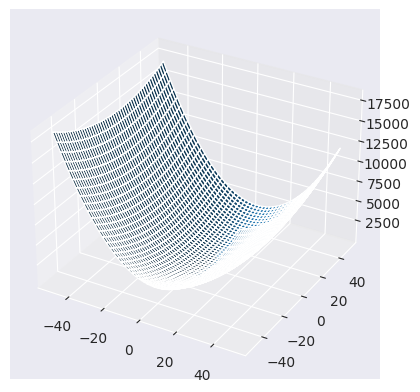

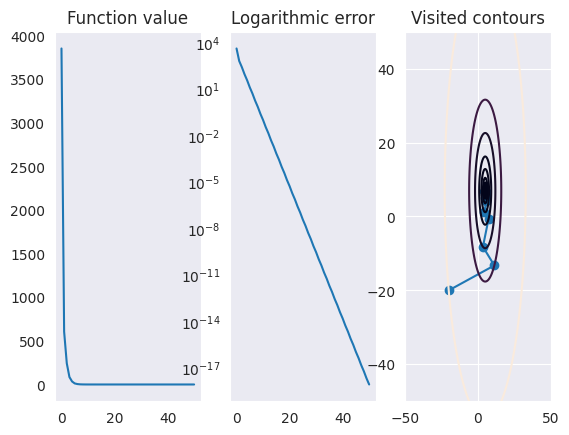

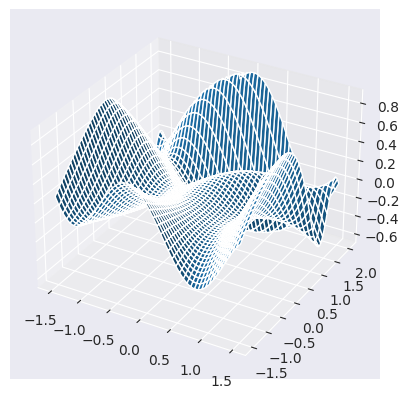

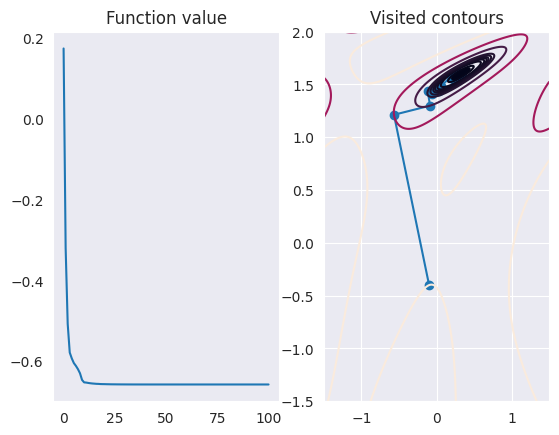

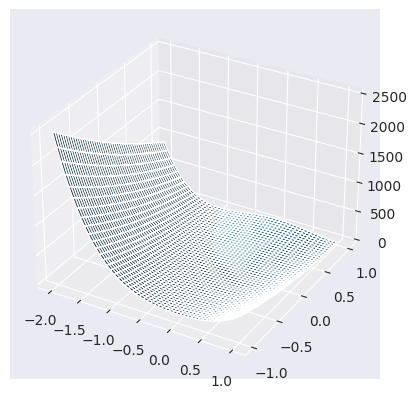

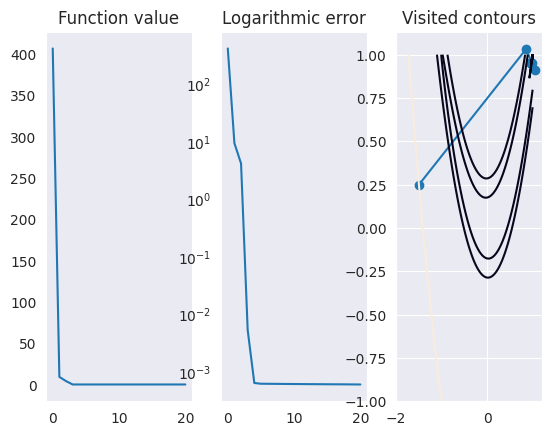

In [5]:
from core.visualizer import test_linear_search
from core.gradient_descent import wolfe_conditions_search

test_linear_search(wolfe_conditions_search(0.1, 0.9))

# Сравнение методов линейного поиска, и метода, удовлетворяющего условиям Вольфе

## Что хотим от line search метода

Мы уже собрали целый зоопарк методов линейного поиска:
- БинПоиск по градиенту (с остановкой по достижению малого значения градиента и/или размера ворот $r - l$, с опциональным обрубанием по количеству итераций)
- Золотое сечение (по количеству итераций)
- Фибоначчи (по количеству итераций)
- Метод, базирующийся на условиях Вольфе (aka backtracking method)

Здесь нужно проанализировать, какие `line searcher`-ы _лучше_ себя показывают. Что от такого алгоритма требуется?

1. Конечно же, хорошо сходиться
2. Произвести _достаточно_ точный поиск, чтобы заЭксплойтить это направление поиска
3. Но не переусердствовать: не слишком долго искать, чтобы сэкономить время

Пункт 1 очевиден и не настолько интересен.
А вот между 2. и 3. налицо трейд-офф по поводу того, насколько быстро надо останавливаться. Для каждой конкретной функции ответ на этот вопрос разный — и хороший line search метод — тот, который хорошо умеет его давать.
Причём давать для самых разных паттернов ландшафта, масштабирований и т.д.

## Как производить оценку

Раз уж так важна устойчивость и догадливость метода, заведём набор _интересных_ функций и попробуем запустить методы на них (метод проходит все функции с одинаковыми гиперпараметрами — приближено к реальности).

Функции:
- квадратичная (какое-то/какие-то число(а) обусловленности, размерность(и))
- умножение на разные константы (маленькую, большую)/масштабирование аргументов
- непредсказуемый рельеф (всё ещё выпуклая, но где-то сильно убывает, где-то — _не очень_…)

Теперь — как оценивать результат. В целом — чем меньше действий, тем лучше. В реальной жизни обычно речь идёт о процессорном времени, но здесь измерять время — это лишняя возня, потеря точности и, главное, bias за счёт того, что у тестовых функций (к примеру, квадратичной) может быть _странное_ отношение времён вычисления функции и градиента. Это затрудняет оценку самого метода линейного поиска, а также не соответствует реальности. Поэтому будем считать, что целевая функция (чем меньше, тем лучше) в данном случае $\operatorname{computations}(f) + \operatorname{computations}(\nabla f)$.

Ожидаем, что методы с фиксированным количеством итераций будут хорошо себя проявлять только для конкретных функций фиксированного уровня сложности, а для других — либо делать избыточную работу внутри каждой итерации, либо плохо отрабатывать очередное направление → потребуется много внешних итераций, иногда даже вообще не сходиться.

А про методы с остановкой по фиксированному $\varepsilon$ ожидаем, что он будет плохо устойчив к масштабированию функции/градиента.